In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn import preprocessing

# Обработка данных

<a id='html_to_csv'></a>
### *html* to *csv*

Скачиваем страницу сайта https://www.notebookcheck-ru.com/Vsjo-o-mobilnykh-processorakh-Opisanie-i-bystrodeistvie.14099.0.html и даём на съедение этому скрипту. (Внимание, не все столбцы!)

Предварительно перевод в ANSI.

In [1]:
with open("all_cpus.html", "r") as myfile:
    data = myfile.read()
myfile.close()

In [ ]:
sym_s = 0
count = 0
while sym_s != -1:
    sym_s = data.find('<sup',sym_s+1) # first sup in column
    sym_e = data.find('</sup>',sym_s)
    data = data[:sym_s] + data[sym_e+6:]
    count  = count + 1
print('Обработали записей: ',count)

# print(sym_s)
# print(sym_e)

In [ ]:
with open("all_cpus_1.html", "w") as myfile:
    myfile.write(data)
myfile.close()

<a id='csv_to_pandas'></a>
### *csv* to *pandas* и предобработка

In [99]:
data = pd.read_csv('all_cpus.csv', keep_default_na=True, na_values='Ранг', decimal='.')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 17 columns):
Ранг                                770 non-null float64
Модель                              808 non-null object
L2 Cache + L3 Cache                 666 non-null object
TDP (Вт)                            603 non-null object
МГц (норм. - - Turbo)               807 non-null object
Ядра / потоки                       808 non-null object
Потенциал, %                        463 non-null object
3DMark06 CPU                        387 non-null object
CB R10 32Bit Single                 422 non-null object
CB R10 32Bit Multi                  420 non-null object
Cinebench R11.5 CPU Single 64Bit    385 non-null object
CB R11.5 64Bit                      432 non-null object
Cinebench R15 CPU Single 64Bit      312 non-null object
Cinebench R15 CPU Multi 64Bit       316 non-null object
wPrime 32                           394 non-null object
x264 Pass 1                         342 non-null objec

In [100]:
data.drop_duplicates(subset='Модель', keep='first', inplace=True)

data = data.drop(data.index[data['Ранг'].isnull()]) # удаляем строки, не содержащие данные
data = data.drop(data.index[data['МГц (норм. - - Turbo)'].isnull()]) # удаляем строки, не содержащие данные

# это должны быть численные значения
data['TDP (Вт)'] = pd.to_numeric(data['TDP (Вт)'])
data['Потенциал, %'] = pd.to_numeric(data['Потенциал, %'])
data['3DMark06 CPU'] = pd.to_numeric(data['3DMark06 CPU'])
data['CB R10 32Bit Single'] = pd.to_numeric(data['CB R10 32Bit Single'])
data['CB R10 32Bit Multi'] = pd.to_numeric(data['CB R10 32Bit Multi'])
data['Cinebench R11.5 CPU Single 64Bit'] = pd.to_numeric(data['Cinebench R11.5 CPU Single 64Bit'])
data['CB R11.5 64Bit'] = pd.to_numeric(data['CB R11.5 64Bit'])
data['Cinebench R15 CPU Single 64Bit'] = pd.to_numeric(data['Cinebench R15 CPU Single 64Bit'])
data['Cinebench R15 CPU Multi 64Bit'] = pd.to_numeric(data['Cinebench R15 CPU Multi 64Bit'])
data['wPrime 32'] = pd.to_numeric(data['wPrime 32'])
data['x264 Pass 1'] = pd.to_numeric(data['x264 Pass 1'])
data['x264 Pass 2'] = pd.to_numeric(data['x264 Pass 2'])

# разбивка столбца на два: ядра и потоки
coresAndThrds = pd.DataFrame(data['Ядра / потоки'].str.split('/',1).tolist(), 
                             columns = ['Ядра','Потоки'], 
                             dtype='float64')
data['Ядра'] = coresAndThrds['Ядра']
data['Потоки'] = coresAndThrds['Потоки']
data = data.drop('Ядра / потоки', axis=1)

# разбивка столбца на два: нормальая и ТурбоБустовая частоты проца.
coresAndThrds = pd.DataFrame(data['МГц (норм. - - Turbo)'].str.replace("\xa0\?\xa0",',').str.split(',',1).tolist(), 
                             columns = ['Частота, норм., МГц','Частота, Turbo, МГц'], 
                             dtype='float64')
data['Частота, норм., МГц'] = coresAndThrds['Частота, норм., МГц']
data['Частота, Turbo, МГц'] = coresAndThrds['Частота, Turbo, МГц']
data = data.drop('МГц (норм. - - Turbo)', axis=1)
data.reindex()

del coresAndThrds


In [111]:
data[data['Atom']==1]

,Ранг,Модель,L2 Cache + L3 Cache,TDP (Вт),"Потенциал, %",3DMark06 CPU,CB R10 32Bit Single,CB R10 32Bit Multi,Cinebench R11.5 CPU Single 64Bit,CB R11.5 64Bit,...,Atom,M-,Celeron,m3,Pentium,Xeon,i3,i5,i7,i9
436,554.0,Intel Atom x7-Z8750,2MB,NaN,27.7,2426.0,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
457,586.0,Intel Atom x7-Z8700,2MB,NaN,20.8,NaN,1114.0,3116.0,0.41,1.26,...,1,0,0,0,0,0,0,0,0,0
470,598.0,Intel Atom x5-Z8550,2MB,NaN,12.2,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
471,599.0,Intel Atom Z3795,2MB,0.0,20.3,2145.5,1234.0,3715.0,0.44,1.63,...,1,0,0,0,0,0,0,0,0,0
472,600.0,Intel Atom Z3785,2MB,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
473,601.0,Intel Atom Z3775,2MB,0.0,22.5,2195.0,1144.0,4014.0,0.40,1.49,...,1,0,0,0,0,0,0,0,0,0
474,602.0,Intel Atom Z3775D,2MB,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
475,603.0,Intel Atom Z3770,2MB,0.0,26.3,2212.0,1189.0,3961.0,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
476,604.0,Intel Atom Z3770D,2MB,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
477,605.0,Intel Atom x5-Z8500,2MB,NaN,11.2,1991.0,1166.0,3563.0,0.43,1.32,...,1,0,0,0,0,0,0,0,0,0


In [101]:
cols = ['Ryzen', 'A12', 'A10', 'A8', 'A6', 'FX', 'Atom', 'M-', 'Celeron', 'm3', 'Pentium', 'Xeon', 'i3', 'i5', 'i7', 'i9']
for col in cols:
    data1 = data['Модель'].str.contains(col)
    data[col] = 0
    data.loc[data1,col] = 1
cols.append('Модель')
data.loc[:,cols].head(10)

,Ryzen,A12,A10,A8,A6,FX,Atom,M-,Celeron,m3,Pentium,Xeon,i3,i5,i7,i9,Модель
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Intel Core i9-7900X
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Intel Core i7-6950X
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Intel Xeon E5-2680 v4
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AMD Ryzen 7 1800X
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Intel Core i7-8700K
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AMD Ryzen 7 1700X
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Intel Xeon E5-2697 v2
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Intel Core i7-7740X
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Intel Core i7-7700K
10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Intel Core i5-8400


In [102]:
data.to_csv('data_cpu_clean.csv')

data.head(5)

,Ранг,Модель,L2 Cache + L3 Cache,TDP (Вт),"Потенциал, %",3DMark06 CPU,CB R10 32Bit Single,CB R10 32Bit Multi,Cinebench R11.5 CPU Single 64Bit,CB R11.5 64Bit,...,Atom,M-,Celeron,m3,Pentium,Xeon,i3,i5,i7,i9
0,1.0,Intel Core i9-7900X,+ 13.8MB,140.0,86.6,12678.0,7287.0,49738.0,2.20,23.88,...,0,0,0,0,0,0,0,0,0,1
1,2.0,Intel Core i7-6950X,2.5MB + 25MB,120.0,74.9,10658.0,6231.0,40378.0,1.90,20.00,...,0,0,0,0,0,0,0,0,1,0
2,3.0,Intel Xeon E5-2680 v4,3.5MB + 35MB,120.0,51.9,8285.5,3707.0,30922.0,1.13,17.65,...,0,0,0,0,0,1,0,0,0,0
3,4.0,AMD Ryzen 7 1800X,4MB + 16MB,95.0,67.8,9585.0,5062.0,32833.0,1.79,18.00,...,0,0,0,0,0,0,0,0,0,0
4,6.0,Intel Core i7-8700K,1MB + 12MB,95.0,79.3,11650.0,7413.0,39624.0,2.27,15.64,...,0,0,0,0,0,0,0,0,1,0



Найдём процессоры, по которым ну совсем нет данных. Найдётся один процессор, из-за которого можно потерять много времени при работе над данными (вывод - проверяй данные =)). Ну и само собой есть процы, по которым не проводили тесты и их место в рейтинге примерное. **Доверимся людям, которые делали этот рейтинг** и не будет выкидывать такие данные, но анализ будем делать только по имеющим тесты процессорам.

In [12]:
# чтобы следующий раз делать анализ без предварительной обработки
if not 'data' in locals():
    data = pd.read_csv('data_cpu_clean.csv', keep_default_na=True, encoding='ansi')
    data.drop('Unnamed: 0', axis=1, inplace=True)
data.info()
    
cpu_list_with_nulls = data[#data['МГц (норм. - - Turbo)'].isnull() &
     data['3DMark06 CPU'].isnull() & 
     data['CB R10 32Bit Single'].isnull() & 
     data['CB R10 32Bit Multi'].isnull() & 
     data['Cinebench R11.5 CPU Single 64Bit'].isnull() & 
     data['CB R11.5 64Bit'].isnull() & 
     data['Cinebench R15 CPU Single 64Bit'].isnull() & 
     data['Cinebench R15 CPU Multi 64Bit'].isnull() & 
     data['wPrime 32'].isnull() & 
     data['x264 Pass 1'].isnull() & 
     data['x264 Pass 2'].isnull()]

cpu_list_with_tests = data[ ~ data['Ранг'].isin(cpu_list_with_nulls['Ранг'])]
cpu_list_with_tests.shape

del cpu_list_with_nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 19 columns):
Ранг                                768 non-null float64
Модель                              768 non-null object
L2 Cache + L3 Cache                 627 non-null object
TDP (Вт)                            565 non-null float64
Потенциал, %                        425 non-null float64
3DMark06 CPU                        349 non-null float64
CB R10 32Bit Single                 384 non-null float64
CB R10 32Bit Multi                  382 non-null float64
Cinebench R11.5 CPU Single 64Bit    347 non-null float64
CB R11.5 64Bit                      394 non-null float64
Cinebench R15 CPU Single 64Bit      274 non-null float64
Cinebench R15 CPU Multi 64Bit       278 non-null float64
wPrime 32                           356 non-null float64
x264 Pass 1                         304 non-null float64
x264 Pass 2                         304 non-null float64
Ядра                                729 no

# Анализ данных

In [91]:
cpu_list_with_tests['wPrime 32'] = cpu_list_with_tests['wPrime 32'].fillna(cpu_list_with_tests['wPrime 32'].max()+1)
cpu_list_with_tests = cpu_list_with_tests.fillna(0)

C:\Users\Ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<a id='corr_matrix'></a>
### Матрица корреляций

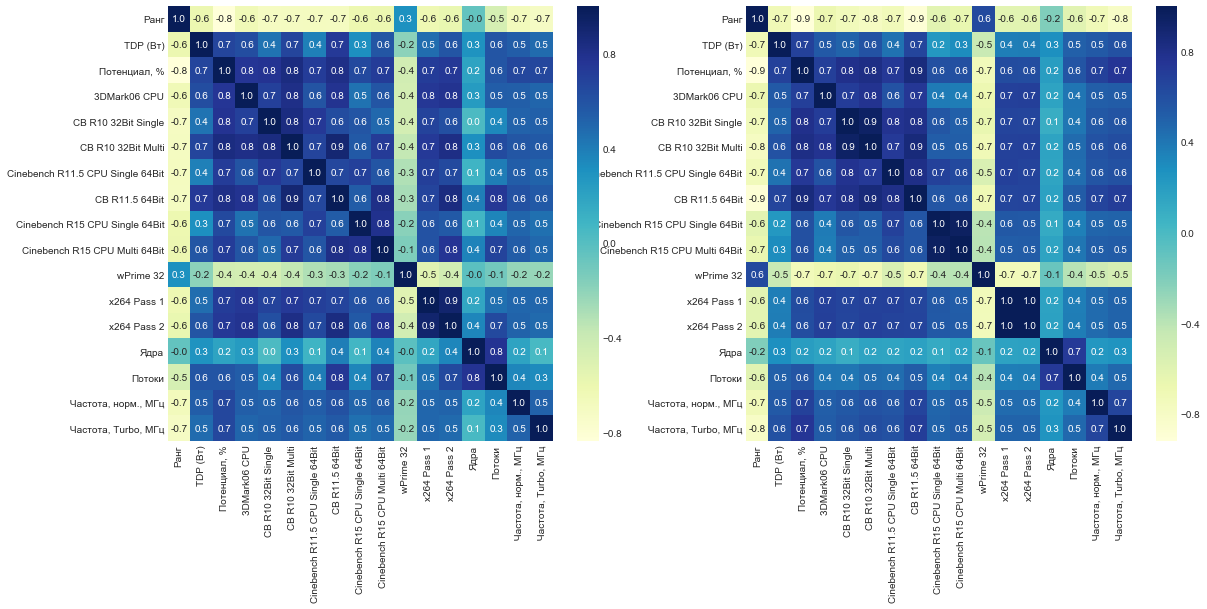

In [12]:
corr = cpu_list_with_tests.corr(method='pearson')
corr_spearman = cpu_list_with_tests.corr(method='spearman')

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(19, 8))
sns.heatmap(corr, cmap='YlGnBu', annot=True, fmt='.1f', ax=ax[0])
sns.heatmap(corr_spearman, cmap='YlGnBu', annot=True, fmt='.1f', ax=ax[1])
f.savefig('./gfx/cpu_corr_matrix.jpg')

<a id='mean_rate'></a>
### Средний рейтинг

Разные тестирующие системы имеют разные особенности. Например, по `x264` считается реальная задача -- можно оценить  скорость обработки видео. Думаю, что по средней оценке можно судить о рейтенге. Но среднее будем считать только по тем данным которые есть, не учитывая пропуски.

In [92]:
test_col_names = ['3DMark06 CPU', 
                  'CB R10 32Bit Single', 
                  'CB R10 32Bit Multi', 
                  'Cinebench R11.5 CPU Single 64Bit', 
                  'CB R11.5 64Bit', 
                  'Cinebench R15 CPU Single 64Bit', 
                  'Cinebench R15 CPU Multi 64Bit', 
                  'wPrime 32', 
                  'x264 Pass 1', 
                  'x264 Pass 2']

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(cpu_list_with_tests[test_col_names])
cpu_list_with_tests_normed = pd.DataFrame(x_scaled, columns=cpu_list_with_tests[test_col_names].columns)
del x_scaled

cpu_list_with_tests_normed['wPrime 32'] = 1.0-cpu_list_with_tests_normed['wPrime 32']

Посмотрим, что из себя представляют процессоры.

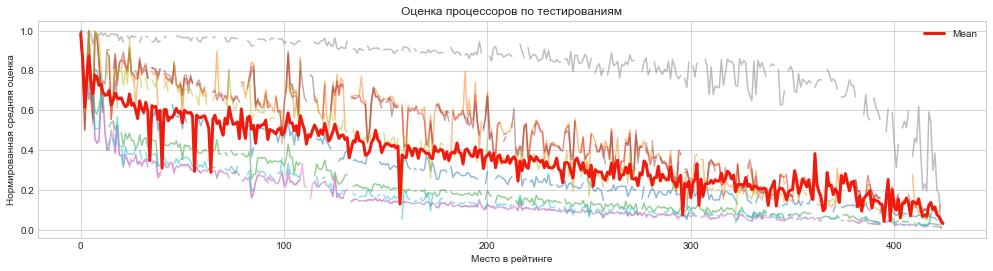

In [93]:
sns.set_style("whitegrid")
mean_cpu_rate = np.mean(cpu_list_with_tests_normed[cpu_list_with_tests_normed>0], 
                        axis=1) # среднее без учёта нулевых значений

plt.figure(figsize=(17,4))
plt.plot(cpu_list_with_tests_normed[cpu_list_with_tests_normed>0], alpha=0.5)
plt.plot(mean_cpu_rate, lw=3, color=(0.95,0.1,0.05), label='Mean')
plt.title('Оценка процессоров по тестированиям')
plt.xlabel('Место в рейтинге')
plt.ylabel('Нормированная средняя оценка')
plt.legend()
plt.savefig('./gfx/cpu_mean-rate.jpg')

Кто там просаживает в первой сотне? Может где-то лажа?

39    0.600181
40    0.310521
41    0.603567
dtype: float64


,Ранг,Модель,L2 Cache + L3 Cache,TDP (Вт),"Потенциал, %",3DMark06 CPU,CB R10 32Bit Single,CB R10 32Bit Multi,Cinebench R11.5 CPU Single 64Bit,CB R11.5 64Bit,Cinebench R15 CPU Single 64Bit,Cinebench R15 CPU Multi 64Bit,wPrime 32,x264 Pass 1,x264 Pass 2,Ядра,Потоки,"Частота, норм., МГц","Частота, Turbo, МГц"
45,57.0,Intel Core i5-7500,1MB + 6MB,65.0,55.9,7247.0,0.0,0.0,1.83,6.89,159.0,585.0,9.72,181.63,39.49,4.0,8.0,2800.0,3700.0
47,59.0,Intel Core i7-5850HQ,1MB + 6MB,47.0,31.1,0.0,0.0,0.0,0.00,0.00,0.0,667.0,138.40,0.00,0.00,4.0,8.0,2800.0,4000.0
48,60.0,Intel Xeon E3-1505M v5,1MB + 8MB,45.0,56.4,7024.0,5560.0,21436.0,1.78,7.91,157.5,724.5,7.80,166.00,45.00,4.0,8.0,2900.0,3900.0


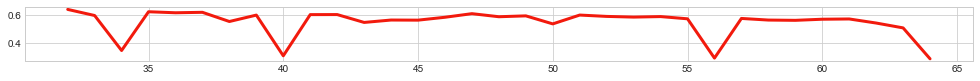

In [121]:
plt.figure(figsize=(17,1))
plt.plot(mean_cpu_rate[32:65], lw=3, color=(0.95,0.1,0.05))
pos = 40
print(mean_cpu_rate[pos-1:pos+2])
cpu_list_with_tests[pos-1:pos+2]

Гипотеза со среднием значением тестов получается не очень сильная из-за пропусков данных, но даёт некоторое представление о том, как падает "оценка" процессоров.

In [ ]:
del cpu_list_with_tests
del cpu_list_with_tests_normed

<a id='cores_and_threads'></a>
### Ядра и потоки

In [17]:
sns.set_style('whitegrid')

Посмотрим сравнение по заданному рангу и количеству потоков/ядер.

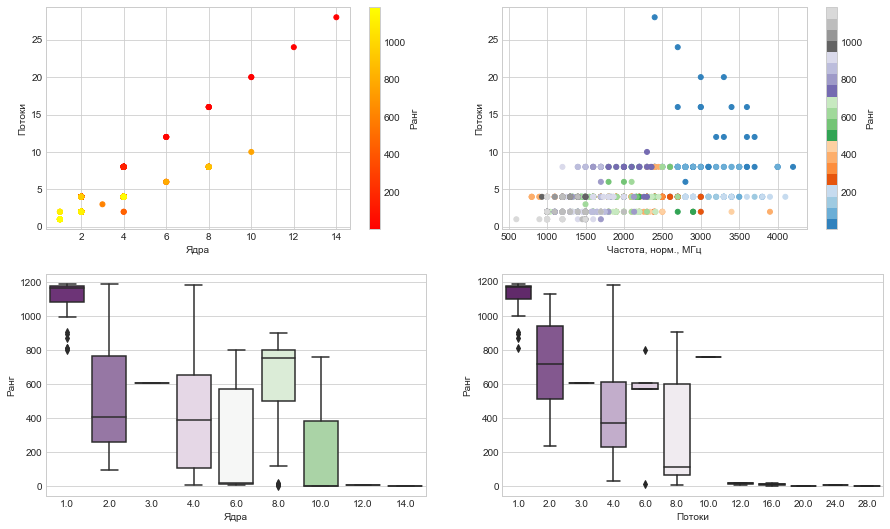

In [9]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))
data.plot.scatter(x='Ядра', 
                  y='Потоки', 
                  c='Ранг',
                  s=25, 
                  ax=ax[0][0], 
                  colormap='autumn', sharex=False)
data.plot.scatter(x='Частота, норм., МГц', 
                  y='Потоки', 
                  c='Ранг', 
                  s=25, 
                  ax=ax[0][1],  
                  colormap='tab20c', sharex=False)
sns.boxplot(y="Ранг", x="Ядра", data=data, palette="PRGn", ax=ax[1][0])
sns.boxplot(y="Ранг", x="Потоки", data=data, palette="PRGn", ax=ax[1][1])
f.savefig('./gfx/cpu_rate_vs_features.jpg')

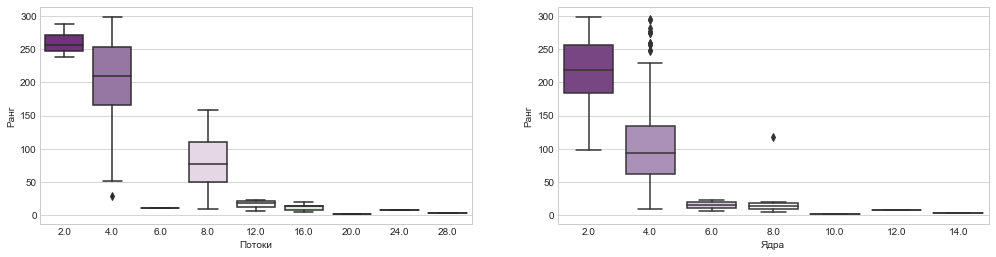

In [137]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 4))

sns.boxplot(y="Ранг", x="Потоки", data=data[data['Ранг']<300], palette="PRGn", ax=ax[0])
sns.boxplot(y="Ранг", x="Ядра", data=data[data['Ранг']<300], palette="PRGn", ax=ax[1])
volumef.savefig('./gfx/cpu_rate_vs_features_1.jpg')

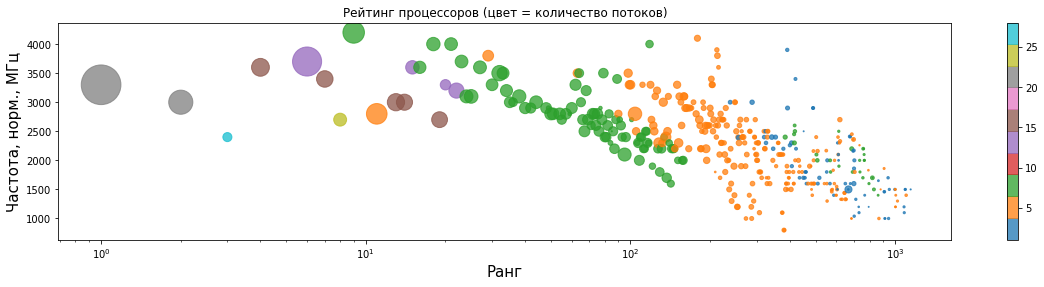

In [7]:
f, ax = plt.subplots(figsize=(20, 4))
sc = ax.scatter(y=data['Частота, норм., МГц'],
           c=data['Потоки'], 
           x=(data['Ранг']),
           s=np.exp(data['Потенциал, %']*0.085), 
           alpha=0.75,
           cmap='tab10')
ax.set_ylabel('Частота, норм., МГц', fontsize=15)
ax.set_xlabel('Ранг', fontsize=15)
ax.set_xscale('log')
ax.set_title('Рейтинг процессоров (цвет = количество потоков)')
plt.colorbar(sc)
plt.savefig('./gfx/cpu_rate_vs_features_2.jpg')

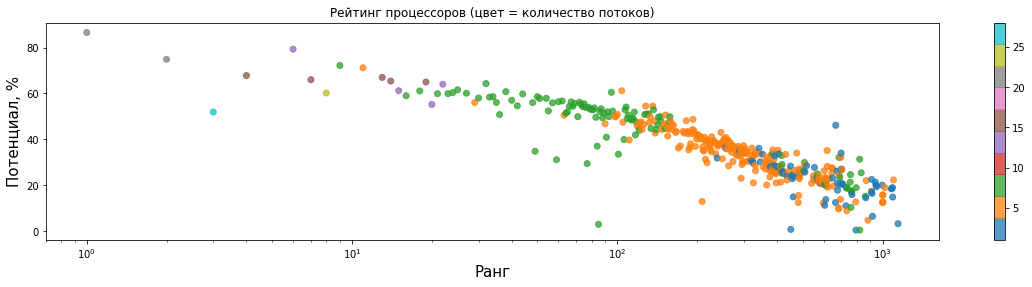

In [14]:
f, ax = plt.subplots(figsize=(20, 4))
sc = ax.scatter(#s=data['Частота, норм., МГц']*0.085,
           c=data['Потоки'], 
           x=data['Ранг'],
           y=data['Потенциал, %'], 
           alpha=0.75,
           cmap='tab10')
ax.set_ylabel('Потенциал, %', fontsize=15)
ax.set_xlabel('Ранг', fontsize=15)
ax.set_xscale('log')
ax.set_title('Рейтинг процессоров (цвет = количество потоков)')
plt.colorbar(sc)
plt.savefig('./gfx/cpu_rate_vs_features_3.jpg')

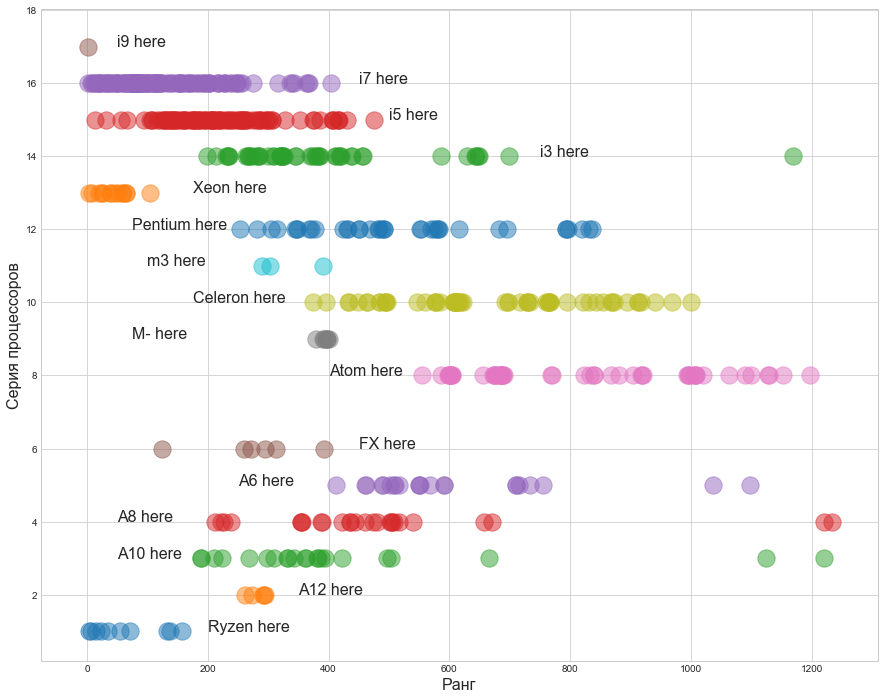

In [177]:
f = plt.figure(figsize=(15,12))

amd_cols = ['Ryzen', 'A12', 'A10', 'A8', 'A6', 'FX']
di = .9/len(amd_cols)
i = 0
for col in amd_cols:
    plt.scatter(y=data[data[col]==1][col]+int(i/di),
            x=data[data[col]==1]['Ранг'],
            s=300,
            alpha=0.5)
    i = i + di
    
intel_cols = ['Atom', 'M-', 'Celeron', 'm3', 'Pentium', 'Xeon', 'i3', 'i5', 'i7']
j = int(i/di)+1
di = .9/len(intel_cols)
i = 0
for col in intel_cols:
    plt.scatter(y=data[data[col]==1][col]+int(i/di + j),
            x=data[data[col]==1]['Ранг'],
            s=300,
            alpha=0.5)
    i = i + di

col='i9'
plt.scatter(y=17,
            x=data[data[col]==1]['Ранг'],
            #marker='x',
            s=300,
            alpha=0.5)
                    
font = {'weight': 'normal',
        'size': 16
        }
plt.ylabel('Серия процессоров', fontdict=font)
plt.xlabel('Ранг', fontdict=font)
plt.text(50, 17, 'i9 here', fontdict=font)
plt.text(450, 16, intel_cols[8]+' here', fontdict=font)
plt.text(500, 15, intel_cols[7]+' here', fontdict=font)
plt.text(750, 14, intel_cols[6]+' here', fontdict=font)
plt.text(175, 13, intel_cols[5]+' here', fontdict=font)
plt.text(75, 12, intel_cols[4]+' here', fontdict=font)
plt.text(100, 11, intel_cols[3]+' here', fontdict=font)
plt.text(175, 10, intel_cols[2]+' here', fontdict=font)
plt.text(75, 9, intel_cols[1]+' here', fontdict=font)
plt.text(400, 8, intel_cols[0]+' here', fontdict=font)

plt.text(450, 6, amd_cols[5]+' here', fontdict=font)
plt.text(250, 5, amd_cols[4]+' here', fontdict=font)
plt.text(50, 4, amd_cols[3]+' here', fontdict=font)
plt.text(50, 3, amd_cols[2]+' here', fontdict=font)
plt.text(350, 2, amd_cols[1]+' here', fontdict=font)
plt.text(200, 1, amd_cols[0]+' here', fontdict=font)

# plt.xscale('log')
plt.savefig('./gfx/cpu_rate_vs_series.jpg')